# Working with the dataset

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
#pd.set_option('display.max_rows', None)

In [2]:
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
pio.templates.default = "plotly_dark"

In [3]:
circuits              = pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/circuits.csv')
constructor_results   = pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/constructor_results.csv')
constructor_standings = pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/constructor_standings.csv')
constructors=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/constructors.csv')
driver_standings=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/driver_standings.csv')
drivers=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/drivers.csv')
lap_times=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/lap_times.csv')
pit_stops=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/pit_stops.csv')
qualifying=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/qualifying.csv')
races=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/races.csv')
results=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/results.csv')
seasons=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/seasons.csv')
status=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/status.csv')

In [4]:
TH_races=races.loc[races['year']>=2014]

In [5]:
qualifying=qualifying.rename(columns={"position":"qualifying_pos"})

In [6]:
qualifying=qualifying.replace("\\N",np.nan)

In [7]:
qualifying['q1']=pd.to_datetime(qualifying['q1'],format="%M:%S.%f")
qualifying['q2']=pd.to_datetime(qualifying['q2'],format="%M:%S.%f")
qualifying['q3']=pd.to_datetime(qualifying['q3'],format="%M:%S.%f")

In [8]:
qualifying['q1_s']=qualifying['q1'].dt.minute*60+qualifying['q1'].dt.second+qualifying['q1'].dt.microsecond*0.000001
qualifying['q2_s']=qualifying['q2'].dt.minute*60+qualifying['q2'].dt.second+qualifying['q2'].dt.microsecond*0.000001
qualifying['q3_s']=qualifying['q3'].dt.minute*60+qualifying['q3'].dt.second+qualifying['q3'].dt.microsecond*0.000001

In [9]:
qualifying.drop(columns=['q1', 'q2', 'q3'],inplace=True)

In [10]:
qualifying['q1min']=qualifying['q1_s']
qualifying['q2min']=qualifying['q2_s']
qualifying['q3min']=qualifying['q3_s']

In [11]:
qualifying=qualifying.merge(qualifying.groupby('raceId').aggregate({'q1min':'min','q2min':'min','q3min':'min'}),left_on='raceId',right_on='raceId')

In [12]:
qualifying=qualifying.rename(columns={"q1min_y":"q1min","q2min_y":"q2min","q3min_y":"q3min"})

In [13]:
qualifying.drop(columns=['q1min_x','q2min_x','q3min_x'],inplace=True)

In [14]:
qualifying['q1_delta']=qualifying['q1min']
qualifying['q2_delta']=qualifying['q2min']
qualifying['q3_delta']=qualifying['q3min']

In [15]:
qualifying['q1_delta']=qualifying['q1_s']-qualifying['q1min']
qualifying['q2_delta']=qualifying['q2_s']-qualifying['q2min']
qualifying['q3_delta']=qualifying['q3_s']-qualifying['q3min']

In [16]:
qualifying.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos', 'q1_s', 'q2_s', 'q3_s', 'q1min', 'q2min', 'q3min',
       'q1_delta', 'q2_delta', 'q3_delta'],
      dtype='object')

In [17]:
qualifyingq1=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q1_s','q1_delta']]
qualifyingq2=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q2_s','q2_delta']]

qualifyingq3=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q3_s','q3_delta']]


In [18]:
results_temp=results[['resultId', 'raceId', 'driverId', 'constructorId','position','statusId','rank']]
results_temp.rename(columns={'rank':'driverRanking','position':'final_position',},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [19]:
TH_races_temp=TH_races[['raceId','year','circuitId']]

In [20]:
constructor_standings_temp=constructor_standings[['constructorStandingsId', 'raceId', 'constructorId','position']]
constructor_standings_temp.rename(columns={'position':'constructor_ranking'},inplace=True)
constructor_standings_temp.head()

,constructorStandingsId,raceId,constructorId,constructor_ranking
0,1,18,1,1
1,2,18,2,3
2,3,18,3,2
3,4,18,4,4
4,5,18,5,5


In [21]:
pit_stops_temp=pit_stops.drop(columns=['time','duration'])
pit_stops_temp.head()

,raceId,driverId,stop,lap,milliseconds
0,841,153,1,1,26898
1,841,30,1,1,25021
2,841,17,1,11,23426
3,841,4,1,12,23251
4,841,13,1,13,23842


In [22]:
temp=qualifyingq2
temp=temp.dropna()
qualifyingq2=temp


In [23]:
temp=qualifyingq3
temp=temp.dropna()
qualifyingq3=temp


In [24]:
q1=qualifyingq1.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q1=q1.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q1=q1.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q1=q1.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q1=q1.loc[(q1['statusId']==1) | (q1['statusId']==11) | (q1['statusId']==12)]
q1.head()

,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q1_s,q1_delta,resultId,final_position,statusId,driverRanking,constructorStandingsId,constructor_ranking,year,circuitId,stop,lap,milliseconds
0,5862,900,3,131,6,3,92.564,1.789,22130,1,1,1,25931,2,2014,1,1,12,24331
1,5862,900,3,131,6,3,92.564,1.789,22130,1,1,1,25931,2,2014,1,2,38,23673
4,5863,900,825,1,20,4,90.949,0.174,22131,2,1,6,25932,1,2014,1,1,12,23150
5,5863,900,825,1,20,4,90.949,0.174,22131,2,1,6,25932,1,2014,1,2,37,22273
6,5870,900,18,1,22,11,91.396,0.621,22132,3,1,5,25932,1,2014,1,1,11,22411


In [25]:
q1.shape

(4502, 19)

In [26]:
q2=qualifyingq2.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q2=q2.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q2=q2.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q2=q2.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q2=q2.loc[(q2['statusId']==1) | (q2['statusId']==11) | (q2['statusId']==12)]

In [27]:
q3=qualifyingq3.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q3=q3.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q3=q3.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q3=q3.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q3=q3.loc[(q3['statusId']==1) | (q3['statusId']==11) | (q3['statusId']==12)]

In [48]:
constructors_code = {}

In [54]:
for i in range(quali.shape[0]):
    constructors_code[quali['name'].iloc[i]] = quali['constructorId'].iloc[i]

In [60]:
driver_name_code = {}
for i in range(quali.shape[0]):
    driver_name_code[quali['Full Name'].iloc[i]] = quali['driverId'].iloc[i]

In [62]:
np.save('driver_name_code.npy', driver_name_code) 

In [ ]:
read_dictionary = np.load('my_file.npy',allow_pickle='TRUE').item()
print(read_dictionary['hello']) # displays "world"

# Machine Learning

In [28]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import svm

In [29]:
q1.drop(columns=['qualifyId','resultId','constructorStandingsId','raceId','q1_s'],inplace=True)
q2.drop(columns=['qualifyId','resultId','constructorStandingsId','raceId','q2_s'],inplace=True)
q3.drop(columns=['qualifyId','resultId','constructorStandingsId','raceId','q3_s'],inplace=True)

In [30]:
q3

,driverId,constructorId,number,qualifying_pos,q3_delta,final_position,statusId,driverRanking,constructor_ranking,year,circuitId,stop,lap,milliseconds
0,3,131,6,3,0.364,1,1,1,2,2014,1,1,12,24331
1,3,131,6,3,0.364,1,1,1,2,2014,1,2,38,23673
4,825,1,20,4,1.514,2,1,6,1,2014,1,1,12,23150
5,825,1,20,4,1.514,2,1,6,1,2014,1,2,37,22273
6,4,6,14,5,1.588,4,1,7,3,2014,1,1,12,22887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,4,214,14,10,1.406,17,11,6,5,2021,4,2,61,23479
2457,817,1,3,7,0.881,6,1,10,3,2021,4,1,25,22406
2458,817,1,3,7,0.881,6,1,10,3,2021,4,2,46,21762
2459,846,1,4,9,1.269,8,11,7,3,2021,4,1,23,21864


In [31]:
q1['final_position']=q1['final_position'].astype(int)
q1['driverRanking']=q1['driverRanking'].astype(int)
q2['final_position']=q2['final_position'].astype(int)
q2['driverRanking']=q2['driverRanking'].astype(int)
q3['final_position']=q3['final_position'].astype(int)
q3['driverRanking']=q3['driverRanking'].astype(int)

In [63]:
quali = q1.merge(drivers,right_on='driverId',left_on='driverId')
quali = quali.merge(constructors , right_on = 'constructorId', left_on = 'constructorId')


In [32]:
test2=q2.merge(q1[['q1_delta','driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds']],left_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'],right_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'])
test3=q3.merge(test2[['q1_delta','driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds','q2_delta']],
              left_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'],
              right_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'])

In [33]:
test=q1

In [34]:
#test=pd.get_dummies(q1,columns=['driverId','constructorId','circuitId'])
#test2=pd.get_dummies(test2,columns=['driverId','constructorId','circuitId'])
#test3=pd.get_dummies(test3,columns=['driverId','constructorId','circuitId'])

In [35]:
test=test.dropna()
test2=test2.dropna()
test3=test3.dropna()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(test.drop(columns=['final_position','qualifying_pos','number','statusId']), test['final_position'], test_size = 0.25, random_state=8)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test2.drop(columns=['final_position','qualifying_pos','number','statusId']), test2['final_position'], test_size = 0.25, random_state=8)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(test3.drop(columns=['final_position','qualifying_pos','number','statusId']), test3['final_position'], test_size = 0.25, random_state=8)

## Decision Tree

In [35]:
decision_tree=DecisionTreeClassifier()
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[107],
    "max_features":['auto','sqrt','log2',''],
    "random_state":np.arange(1,10)   
}
test_model=model_selection.GridSearchCV(estimator=decision_tree,param_grid=param_grid,
                                       scoring='accuracy',verbose=10)
test_model.fit(X_train_2,y_train_2)
print(test_model.best_score_)
print(test_model.best_estimator_.get_params())


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.520, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.542, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.536, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.516, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.501, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=2 
[CV]  criterion=g

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=4, score=0.516, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=4 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=4, score=0.538, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=4 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=4, score=0.535, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=5 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=5, score=0.574, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=5 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=5, score=0.540, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=5 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=5, score=0.506, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_

[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=4 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=4 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=4 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=5 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=5, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=5 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=5, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=5 ....
[CV]  criterion=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_

In [37]:
dtree = DecisionTreeClassifier(max_depth=107, random_state=9,max_features='auto')
dtree_2 = DecisionTreeClassifier(max_depth=107, random_state=9)
dtree_3 = DecisionTreeClassifier(max_depth=107, random_state=9)
dtree.fit(X_train, y_train)
dtree_2.fit(X_train_2, y_train_2)
dtree_3.fit(X_train_3, y_train_3)
dtq1= dtree.predict(X_train)
dq1 = dtree.predict(X_test)
dtq2= dtree_2.predict(X_train_2)
dq2 = dtree_2.predict(X_test_2)
dtq3= dtree_3.predict(X_train_3)
dq3 = dtree_3.predict(X_test_3)

In [38]:
print('Accuracy via prediction on training set q1: ', accuracy_score(y_train, dtq1))
print('Accuracy via prediction on test set q1: ', accuracy_score(y_test, dq1))
print('Accuracy via prediction on training set q2: ', accuracy_score(y_train_2, dtq2))
print('Accuracy via prediction on test set q2: ', accuracy_score(y_test_2, dq2))
print('Accuracy via prediction on training set q3: ', r2_score(y_train_3, dtq3))
print('Accuracy via prediction on test set q3: ', accuracy_score(y_test_3, dq3))

Accuracy via prediction on training set q1:  1.0
Accuracy via prediction on test set q1:  0.493705035971223
Accuracy via prediction on training set q2:  1.0
Accuracy via prediction on test set q2:  0.5666266506602641
Accuracy via prediction on training set q3:  1.0
Accuracy via prediction on test set q3:  0.6631016042780749


Text(0.5, 1.0, 'Q3')

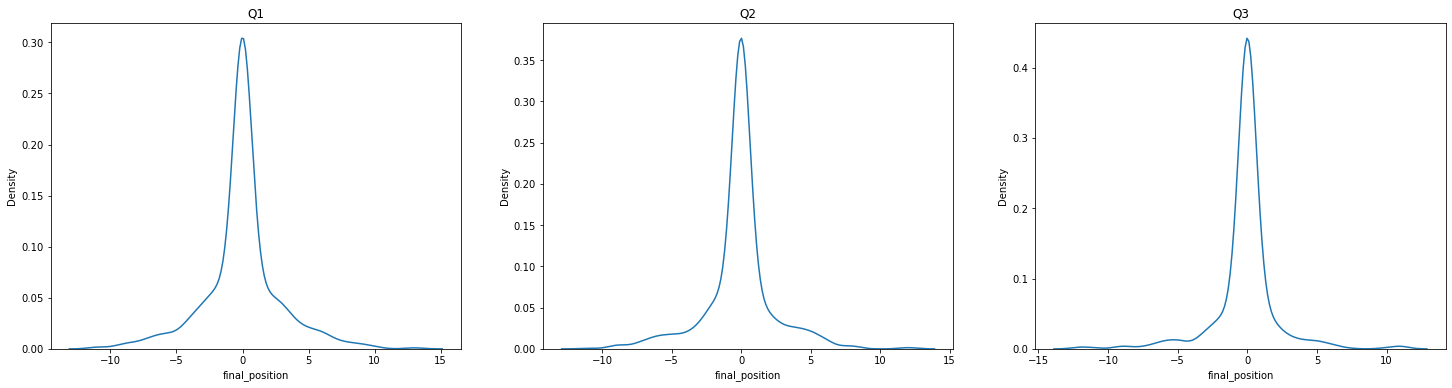

In [39]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,3,figsize=(25,6))
dif1=y_test-dq1
sn.kdeplot(dif1,ax=axes[0])
axes[0].set_title('Q1')
dif2=y_test_2-dq2
sn.kdeplot(dif2,ax=axes[1])
axes[1].set_title('Q2')
dif3=y_test_3-dq3
sn.kdeplot(dif3,ax=axes[2])
axes[2].set_title('Q3')

<AxesSubplot:>

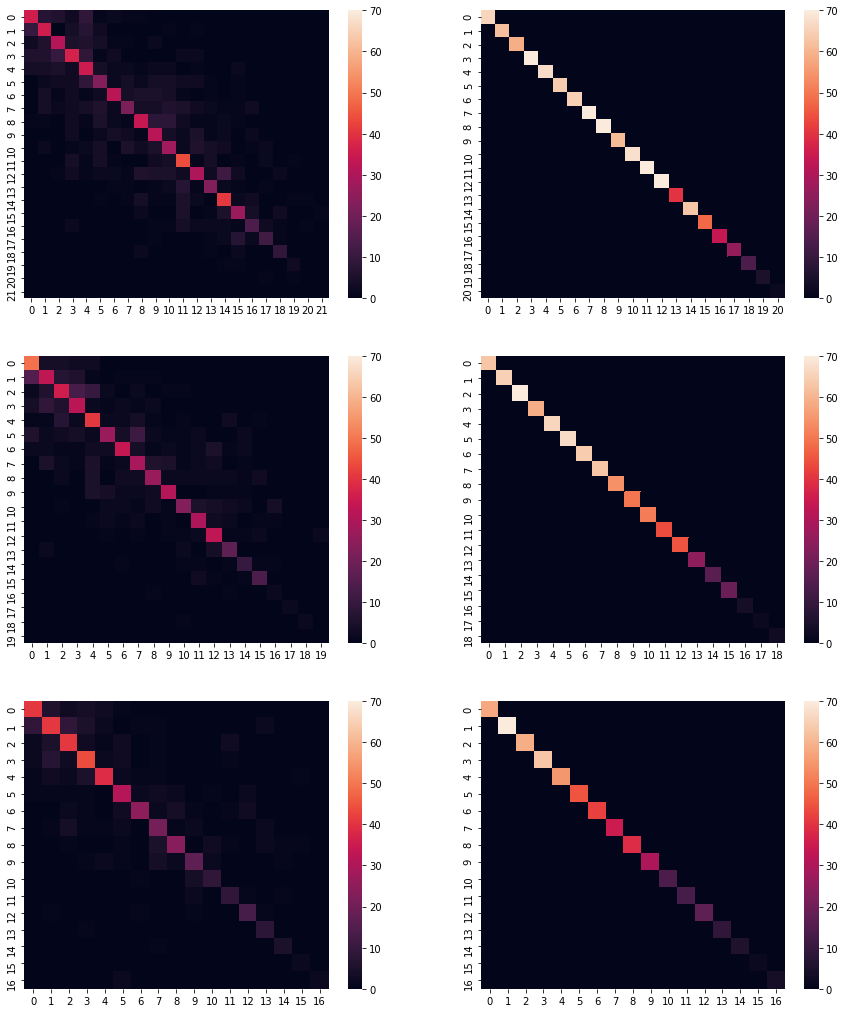

In [40]:
fig,axes=plt.subplots(3,2,figsize=(15,18))
cm = pd.DataFrame(confusion_matrix(y_test, dq1))
sn.heatmap(cm,ax=axes[0,0], vmin=0,vmax=70 )
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[0,1], vmin=0,vmax=70 )
cm3 = pd.DataFrame(confusion_matrix(y_test_2, dq2))
sn.heatmap(cm3,ax=axes[1,0], vmin=0,vmax=70 )
cm4 = pd.DataFrame(confusion_matrix(y_test_2, y_test_2))
sn.heatmap(cm4,ax=axes[1,1], vmin=0,vmax=70 )
cm5 = pd.DataFrame(confusion_matrix(y_test_3, dq3))
sn.heatmap(cm5,ax=axes[2,0], vmin=0,vmax=70 )
cm6 = pd.DataFrame(confusion_matrix(y_test_3, y_test_3))
sn.heatmap(cm6,ax=axes[2,1], vmin=0,vmax=70 )


## RandomForest

In [39]:
random_forest=RandomForestClassifier()
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[107],
    'n_estimators':[100,200,300,400,500],
    "max_features":['auto','sqrt','log2'],
    'min_impurity_decrease':[0,0.05,0.1,0.15],
    "random_state":[1]   
}
test_model=model_selection.GridSearchCV(estimator=random_forest,param_grid=param_grid,
                                       scoring='accuracy',verbose=10)
test_model.fit(X_train_2,y_train_2)
print(test_model.best_score_)
print(test_model.best_estimator_.get_params())

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.654, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.674, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.674, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.664, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.651, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.658, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.692, total=   0.9s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.676, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.670, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.651, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1, score=0.668, total=   1.4s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1, score=0.682, total=   1.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1, score=0.684, total=   1.4s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimato

[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.05, n_estimators=400, random_state=1, score=0.082, total=   0.6s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.05, n_estimators=400, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.05, n_estimators=400, random_state=1, score=0.082, total=   0.6s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.05, n_estimators=400, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.05, n_estimators=400, random_state=1, score=0.082, total=   0.6s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.05, n_estimators=400, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.05, n_estimators=400, random_state=1, score=0.084, total=   0.6s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_d

[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.1, n_estimators=500, random_state=1, score=0.082, total=   0.8s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.1, n_estimators=500, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.1, n_estimators=500, random_state=1, score=0.084, total=   0.8s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.15, n_estimators=100, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.15, n_estimators=100, random_state=1, score=0.082, total=   0.2s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.15, n_estimators=100, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0.15, n_estimators=100, random_state=1, score=0.082, total=   0.2s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decr

[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.658, total=   0.9s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimators=200, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.692, total=   0.9s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimators=200, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.676, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimators=200, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.670, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0, n_estimato

[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.05, n_estimators=300, random_state=1, score=0.082, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.05, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.05, n_estimators=300, random_state=1, score=0.082, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.05, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.05, n_estimators=300, random_state=1, score=0.084, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.05, n_estimators=400, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.05, n_estimators=400, random_state=1, score=0.082, total=   0.6s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_d

[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.1, n_estimators=400, random_state=1, score=0.084, total=   0.9s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.1, n_estimators=500, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.1, n_estimators=500, random_state=1, score=0.082, total=   1.1s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.1, n_estimators=500, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.1, n_estimators=500, random_state=1, score=0.082, total=   1.1s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.1, n_estimators=500, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease=0.1, n_estimators=500, random_state=1, score=0.082, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=sqrt, min_impurity_decrease

[CV]  criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.674, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimators=100, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.674, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimators=100, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.664, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimators=100, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.651, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=log2, min_impurity_decrease=0, n_estimato

KeyboardInterrupt: 

In [41]:
rf=RandomForestClassifier(max_depth=107,random_state=8)
rf_2=RandomForestClassifier(max_depth=107,random_state=8)
rf_3=RandomForestClassifier(max_depth=107,random_state=8)
rf.fit(X_train, y_train)
rf_2.fit(X_train_2, y_train_2)
rf_3.fit(X_train_3, y_train_3)
rtq1= rf.predict(X_train)
rq1 = rf.predict(X_test)
rtq2= rf_2.predict(X_train_2)
rq2 = rf_2.predict(X_test_2)
rtq3= rf_3.predict(X_train_3)
rq3 = rf_3.predict(X_test_3)

In [42]:
print('Accuracy via prediction on training set q1: ', accuracy_score(y_train, rtq1))
print('Accuracy via prediction on test set q1: ', accuracy_score(y_test, rq1))
print('Accuracy via prediction on training set q2: ', accuracy_score(y_train_2, rtq2))
print('Accuracy via prediction on test set q2: ', accuracy_score(y_test_2, rq2))
print('Accuracy via prediction on training set q3: ', r2_score(y_train_3, rtq3))
print('Accuracy via prediction on test set q3: ', accuracy_score(y_test_3, rq3))

Accuracy via prediction on training set q1:  1.0
Accuracy via prediction on test set q1:  0.6510791366906474
Accuracy via prediction on training set q2:  1.0
Accuracy via prediction on test set q2:  0.6746698679471789
Accuracy via prediction on training set q3:  1.0
Accuracy via prediction on test set q3:  0.7611408199643493


Text(0.5, 1.0, 'Q3')

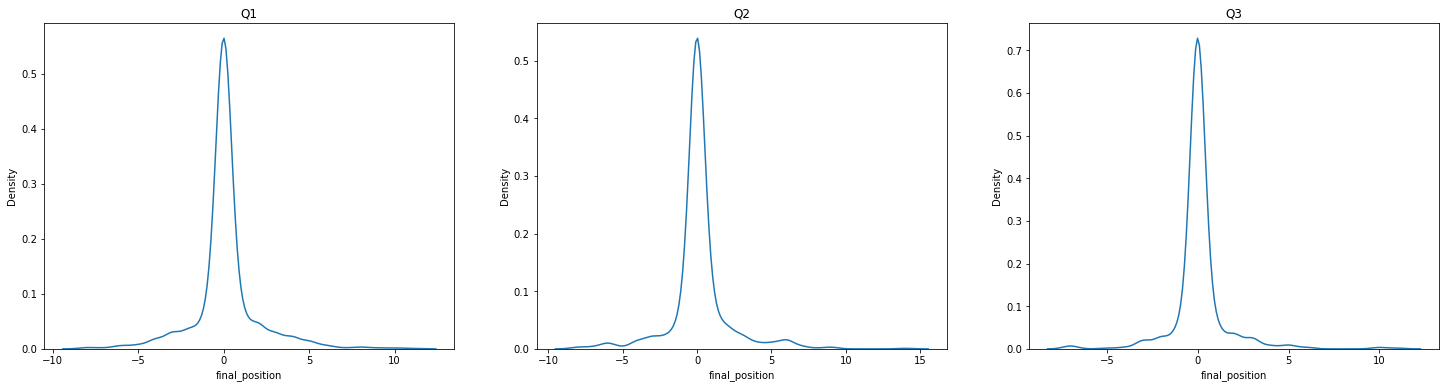

In [43]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,3,figsize=(25,6))
dif1=y_test-rq1
sn.kdeplot(dif1,ax=axes[0])
axes[0].set_title('Q1')
dif2=y_test_2-rq2
sn.kdeplot(dif2,ax=axes[1])
axes[1].set_title('Q2')
dif3=y_test_3-rq3
sn.kdeplot(dif3,ax=axes[2])
axes[2].set_title('Q3')

<AxesSubplot:>

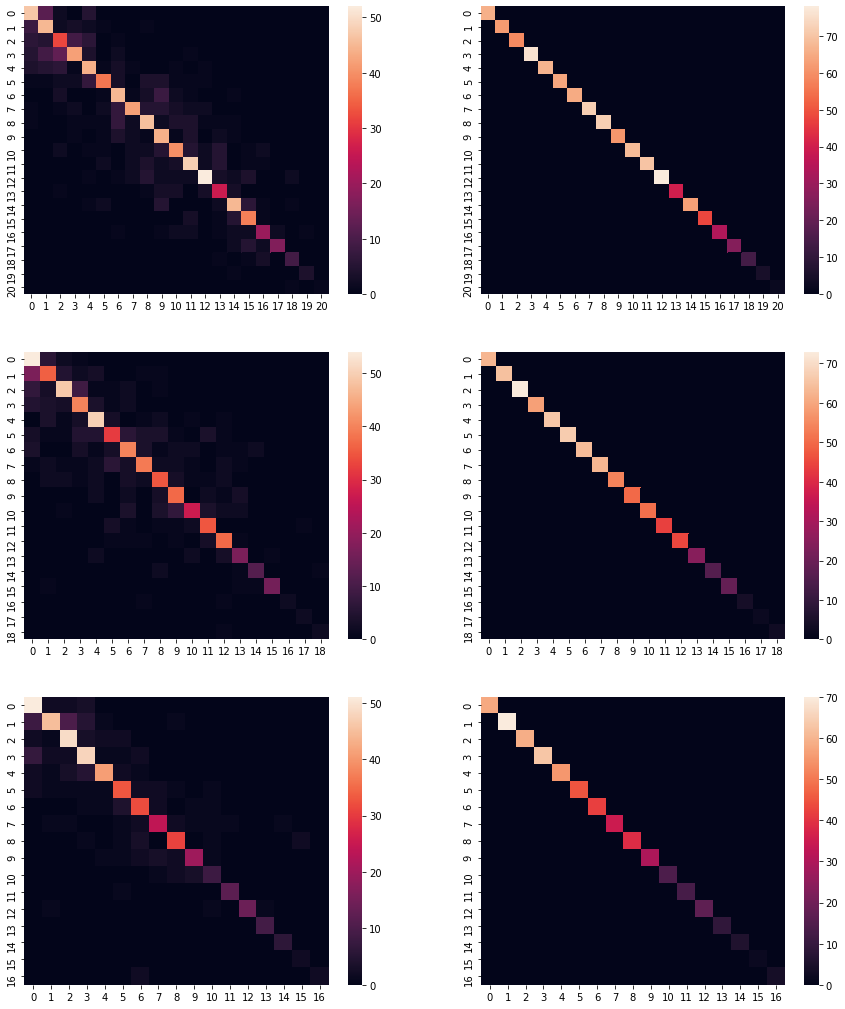

In [44]:
fig,axes=plt.subplots(3,2,figsize=(15,18))
cm = pd.DataFrame(confusion_matrix(y_test, rq1))
sn.heatmap(cm,ax=axes[0,0])
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[0,1])
cm3 = pd.DataFrame(confusion_matrix(y_test_2, rq2))
sn.heatmap(cm3,ax=axes[1,0])
cm4 = pd.DataFrame(confusion_matrix(y_test_2, y_test_2))
sn.heatmap(cm4,ax=axes[1,1])
cm5 = pd.DataFrame(confusion_matrix(y_test_3, rq3))
sn.heatmap(cm5,ax=axes[2,0])
cm6 = pd.DataFrame(confusion_matrix(y_test_3, y_test_3))
sn.heatmap(cm6,ax=axes[2,1])


## Extra Trees

In [45]:
etc=ExtraTreesClassifier(max_depth=107)
etc_2=ExtraTreesClassifier(max_depth=107)
etc_3=ExtraTreesClassifier(max_depth=107)
etc.fit(X_train, y_train)
etc_2.fit(X_train_2, y_train_2)
etc_3.fit(X_train_3, y_train_3)
etq1= etc.predict(X_train)
eq1 = etc.predict(X_test)
etq2= etc_2.predict(X_train_2)
eq2 = etc_2.predict(X_test_2)
etq3= etc_3.predict(X_train_3)
eq3 = etc_3.predict(X_test_3)

In [82]:
etc=ExtraTreesRegressor(max_depth=107)
etc_2=ExtraTreesRegressor(max_depth=107)
etc_3=ExtraTreesRegressor(max_depth=107)
etc.fit(X_train, y_train)
etc_2.fit(X_train_2, y_train_2)
etc_3.fit(X_train_3, y_train_3)
etq1= etc.predict(X_train)
eq1 = etc.predict(X_test)
etq2= etc_2.predict(X_train_2)
eq2 = etc_2.predict(X_test_2)
etq3= etc_3.predict(X_train_3)
eq3 = etc_3.predict(X_test_3)

In [46]:
print('Accuracy via prediction on training set q1: ', accuracy_score(y_train, etq1))
print('Accuracy via prediction on test set q1: ', accuracy_score(y_test, eq1))
print('Accuracy via prediction on training set q2: ', accuracy_score(y_train_2, etq2))
print('Accuracy via prediction on test set q2: ', accuracy_score(y_test_2, eq2))
print('Accuracy via prediction on training set q3: ', r2_score(y_train_3, etq3))
print('Accuracy via prediction on test set q3: ', accuracy_score(y_test_3, eq3))

Accuracy via prediction on training set q1:  1.0
Accuracy via prediction on test set q1:  0.6969424460431655
Accuracy via prediction on training set q2:  1.0
Accuracy via prediction on test set q2:  0.709483793517407
Accuracy via prediction on training set q3:  1.0
Accuracy via prediction on test set q3:  0.7843137254901961


## SVM

In [47]:
clf = svm.SVC()
param_grid={
    "kernel":[ 'rbf', 'sigmoid'],
    "degree":[3,4,5],
    "C":(1,20),
    "decision_function_shape":['ovo','ovr']
}

In [ ]:
s_vm=model_selection.GridSearchCV(estimator=clf,param_grid=param_grid,scoring="accuracy",verbose=10,cv=5,n_jobs=1)
s_vm.fit(X_train_2,y_train_2)
print(s_vm.best_score_)
print(s_vm.best_estimator_.get_params())

In [48]:
clf.fit(X_train, y_train)
tr3=clf.predict(X_train)
y3=clf.predict(X_test)

In [49]:
print('R squared via prediction on training set: ', r2_score(y_train, tr3))
print('R squared via prediction on test set: ', r2_score(y_test, y3))

R squared via prediction on training set:  -0.04115740204034957
R squared via prediction on test set:  -0.04332899681989022


<AxesSubplot:xlabel='final_position', ylabel='Density'>

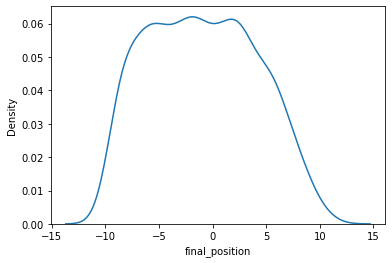

In [50]:
difference=y_test-y3
sns.kdeplot(difference)

0.053057553956834536

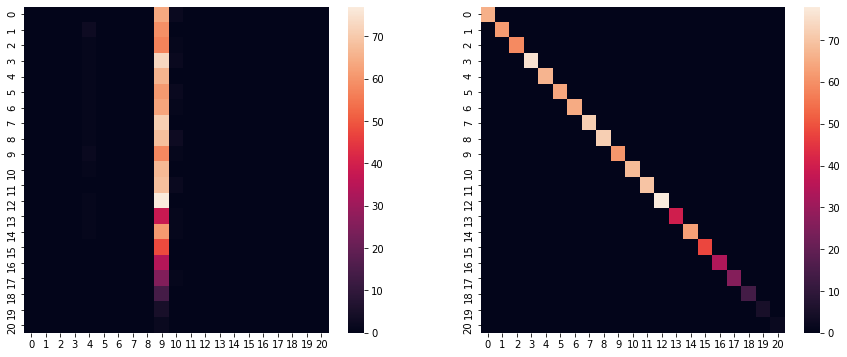

In [51]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,2,figsize=(15,6))
cm = pd.DataFrame(confusion_matrix(y_test, y3))
sn.heatmap(cm,ax=axes[0])
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[1])
score = accuracy_score(y_test, y3)
score

## HyperOpt

In [52]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn to c:\users\apex\appdata\local\temp\pip-req-build-hh5wx57h


  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn 'C:\Users\Apex\AppData\Local\Temp\pip-req-build-hh5wx57h'


In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
from hpsklearn import random_forest,svc,knn,extra_trees

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [52]:
model = HyperoptEstimator(classifier=any_classifier('clf'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, trial_timeout=30)

In [53]:
X_train = np.asarray(X_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [54]:
model.fit(X_train, y_train)
# summarize performance
acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)
# summarize the best model
print(model.best_model())

100%|██████████| 1/1 [00:00<00:00,  8.71it/s, best loss: 0.5367316341829085]
Accuracy: 0.522
{'learner': ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None,
                     max_features=0.17072140485094556, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=622, n_jobs=1, oob_score=False,
                     random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}


In [55]:
y4 = model.predict(X_test)
acc = accuracy_score(y_test, y4)
print("Accuracy: %.3f" % acc)

Accuracy: 0.522


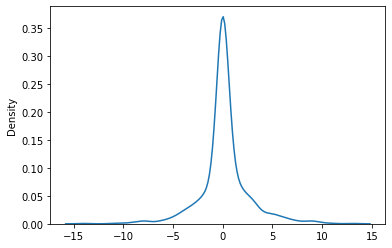

In [56]:
difference=y_test-y4
sns.kdeplot(difference)

0.5215827338129496

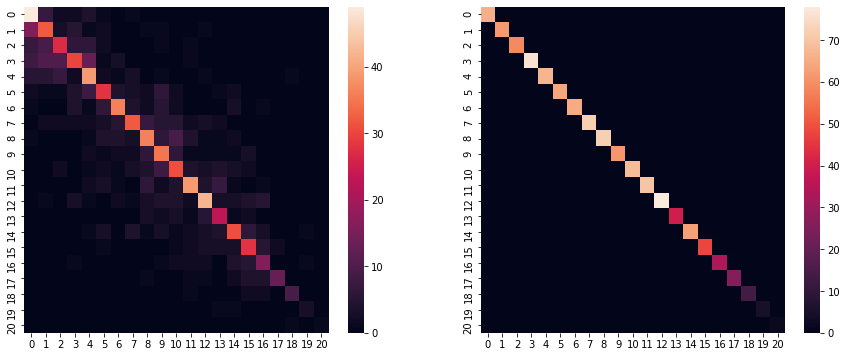

In [57]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,2,figsize=(15,6))
cm = pd.DataFrame(confusion_matrix(y_test, y4))
sn.heatmap(cm,ax=axes[0])
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[1])
score = accuracy_score(y_test, y4)
score

# ANN

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

## Q1 

In [54]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
X_train.shape

(3333, 10)

In [56]:
y_train=pd.get_dummies(y_train)

In [57]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(103, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(256, activation='relu'))
ann.add(tf.keras.layers.Dense(1, activation='softmax'))

In [58]:
ann.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 103)               1133      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              106496    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 1,813,614
Trainable params: 1,813,614
Non-trainable params: 0
______________________________________________

In [ ]:
ann.fit(X_train, y_train, epochs=100)

Epoch 1/100


In [ ]:
y_pred = ann.predict(X_test)

y_pred_train=ann.predict(X_train)


In [ ]:
predictions=[0]*y_pred.shape[0]

for i in range(y_pred.shape[0]):
    predictions[i]=np.argmax(y_pred[i])+1

In [ ]:

print('R squared via prediction on test set: ', accuracy_score(y_test,predictions))

## Q2

In [ ]:
X_train = np.asarray(X_train_2).astype(np.float32)
X_test = np.asarray(X_test_2).astype(np.float32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_train=pd.get_dummies(y_train_2)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(103, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(256, activation='relu'))
ann.add(tf.keras.layers.Dense(20, activation='softmax'))

In [ ]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.summary()

In [ ]:
ann.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred = ann.predict(X_test)
y_pred_train=ann.predict(X_train)

In [ ]:
test_predictions=[0]*y_pred.shape[0]
for i in range(y_pred.shape[0]):
    test_predictions[i]=np.argmax(y_pred[i])+1
train_predictions=[0]*y_pred_train.shape[0]
for i in range(y_pred_train.shape[0]):
    train_predictions[i]=np.argmax(y_pred_train[i])+1

In [ ]:
print('Accuracy via prediction on test set: ', accuracy_score(y_test_2,test_predictions))
print('Accuracy via prediction on test set: ', accuracy_score(y_train_2,train_predictions))

## Q3 

In [ ]:
X_train = np.asarray(X_train_3).astype(np.float32)
X_test = np.asarray(X_test_3).astype(np.float32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_train=pd.get_dummies(y_train_3)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(103, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(256, activation='relu'))
ann.add(tf.keras.layers.Dense(19, activation='softmax'))

In [ ]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.summary()

In [ ]:
ann.fit(X_train, y_train, epochs=75)

In [ ]:
y_pred=ann.predict(X_test)
y_pred_train=ann.predict(X_train)

In [ ]:
test_predictions=[0]*y_pred.shape[0]
for i in range(y_pred.shape[0]):
    test_predictions[i]=np.argmax(y_pred[i])+1
train_predictions=[0]*y_pred_train.shape[0]
for i in range(y_pred_train.shape[0]):
    train_predictions[i]=np.argmax(y_pred_train[i])+1

In [ ]:
print('Accuracy via prediction on test set: ', accuracy_score(y_test_3,test_predictions))
print('Accuracy via prediction on test set: ', accuracy_score(y_train_3,train_predictions))

In [ ]:
for i in range(5):
    for j in range(4):
        if j==3:
            break
        print(i,j)